In [1]:
import pandas as pd
import numpy as np

# 1. Calculate GHI values for each month

In [2]:
import bifacial_radiance as br

In [3]:
radObj = br.RadianceObj(path='TEMP')

startdates = [pd.to_datetime('2021-05-01 6:0:0'), #
                pd.to_datetime('2021-06-01 6:0:0'),
                pd.to_datetime('2021-07-01 6:0:0'),
                pd.to_datetime('2021-08-01 6:0:0'),
                pd.to_datetime('2021-09-01 6:0:0'),
                pd.to_datetime('2021-05-01 6:0:0')]
enddates = [pd.to_datetime('2021-05-31 6:0:0'),       # May
                pd.to_datetime('2021-06-30 20:0:0'),   # June
                pd.to_datetime('2021-07-31 20:0:0'),   # etc.
                pd.to_datetime('2021-08-31 20:0:0'),
                pd.to_datetime('2021-09-30 20:0:0'), 
                pd.to_datetime('2021-09-30 20:0:0')]   # Season


path = TEMP


In [4]:
ghi = []
for ii in range (0, len(startdates)):
    metData = radObj.readWeatherFile('../USA_CO_Golden-NREL.724666_TMY3.epw', starttime=startdates[ii], endtime=enddates[ii], coerce_year=2021)
    ghi.append(metData.ghi.sum())


8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Filtering dates
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun posit

In [5]:
ghi

[181874, 187855, 191439, 182660, 147863, 899356]

In [6]:
data = pd.read_pickle('../Results_Golden.pkl')

In [7]:
# array hub-height
hubheights = [1.5, 2.4] # meters
rtrs = [5.0, 10.0]# ,6.0] # meters
xgaps = [0.0, 1.0]# ,6.0] # meters
periods = ['5TO5', '6TO6', '7TO7', '8TO8', '9TO9','5TO9'] # add more to match other time periods


In [8]:
newdf = []
xgap_all = []
hubheight_all = []
rtr_all = []
period_all = []
ground_all = []
front_all = []
rear_all = []

for hubheight in hubheights:
    for rtr in rtrs:
        for xgap in xgaps:
            for period in periods:
                
                if period == '5TO5':
                    ii = 0
                if period == '6TO6':
                    ii = 1
                    
                if period == '7TO7':
                    ii = 2
                    
                if period == '8TO8':
                    ii = 3
                    
                if period == '9TO9':
                    ii = 4
                                        
                if period == '5TO9':
                    ii = 5
                    
                foo = data[(data['hubheight']==hubheight) & (data['rtr']==rtr) & (data['xgap']==xgap) &
                          (data['period']==period)]# ['Wm2Ground'].to_frame()

                foo2 = foo['Wm2Ground'].astype(str).str[1:-1]
                ground_all.append(foo2.str.split(',', expand=True).astype(float).sum(axis=0).values/ghi[ii])
                
                foo2 = foo['Wm2Front'].astype(str).str[1:-1]
                front_all.append(foo2.str.split(',', expand=True).astype(float).sum(axis=0).values/ghi[ii])

                foo2 = foo['Wm2Back'].astype(str).str[1:-1]
                rear_all.append(foo2.str.split(',', expand=True).astype(float).sum(axis=0).values/ghi[ii])

                rtr_all.append(rtr)
                hubheight_all.append(hubheight)
                xgap_all.append(xgap)
                period_all.append(period)

df = pd.DataFrame(list(zip(period_all, xgap_all, hubheight_all, rtr_all, ground_all, front_all, rear_all)),
                 columns=['period', 'xgap', 'hubheight', 'rtr', 'ground', 'front', 'rear'])

In [9]:
df.to_csv('../results_Austin.csv')

In [10]:
df

,period,xgap,hubheight,rtr,ground,front,rear
0,5TO5,0.0,1.5,5.0,"[0.26081974388862617, 0.2543804425041512, 0.28...","[1.2051821354344217, 1.2144872752564964, 1.219...","[0.10517483230148343, 0.09985881945742657, 0.0..."
1,6TO6,0.0,1.5,5.0,"[0.26243103750232893, 0.2668241039631631, 0.29...","[1.1872565957786592, 1.1997156982779273, 1.206...","[0.10568047089510527, 0.0999499376646882, 0.09..."
2,7TO7,0.0,1.5,5.0,"[0.2516181599360632, 0.2578205533877632, 0.308...","[1.190177593123658, 1.199355023636772, 1.21110...","[0.10477257533731371, 0.09869169056461849, 0.0..."
3,8TO8,0.0,1.5,5.0,"[0.26191085689258736, 0.2724746510456586, 0.28...","[1.2142084605825032, 1.2213370718821854, 1.217...","[0.10491750267163034, 0.09896670800394175, 0.0..."
4,9TO9,0.0,1.5,5.0,"[0.2698660567552396, 0.27814851186571354, 0.29...","[1.190312967679541, 1.20301982619046, 1.219640...","[0.1023320352826603, 0.0970702618369707, 0.092..."
5,5TO9,0.0,1.5,5.0,"[0.2632530961710379, 0.26631735992198863, 0.29...","[1.1870586036007986, 1.1975262487824623, 1.220...","[0.10447734508915268, 0.09873594293027457, 0.0..."
6,5TO5,1.0,1.5,5.0,"[0.54956340928335, 0.5510733403345173, 0.55278...","[1.2285878426822967, 1.233645815784554, 1.2378...","[0.15175897439985925, 0.14919862459724864, 0.1..."
7,6TO6,1.0,1.5,5.0,"[0.49360162795773344, 0.49467657533736126, 0.5...","[1.204598824518911, 1.2054765743259428, 1.2095...","[0.14996077059434137, 0.1474802241622528, 0.14..."
8,7TO7,1.0,1.5,5.0,"[0.4741765061977967, 0.4716040773301156, 0.509...","[1.2224437179467087, 1.2246397006879475, 1.227...","[0.15015750756115523, 0.14742872335313076, 0.1..."
9,8TO8,1.0,1.5,5.0,"[0.6765331976349502, 0.6816163834993979, 0.687...","[1.2287665742910325, 1.2326805798751779, 1.236...","[0.1516280804773897, 0.1490523772035476, 0.147..."


In [11]:
y1 = df[(df['hubheight']==1.5) & (df['rtr']==5.0) & (df['xgap']==0.0) &
                          (df['period']=='5TO5')]['ground'].values[0]
y2 = df[(df['hubheight']==1.5) & (df['rtr']==5.0) & (df['xgap']==0.0) &
                          (df['period']=='6TO6')]['ground'].values[0]
y3 = df[(df['hubheight']==1.5) & (df['rtr']==5.0) & (df['xgap']==0.0) &
                          (df['period']=='7TO7')]['ground'].values[0]
y4 = df[(df['hubheight']==1.5) & (df['rtr']==5.0) & (df['xgap']==0.0) &
                          (df['period']=='8TO8')]['ground'].values[0]
y5 = df[(df['hubheight']==1.5) & (df['rtr']==5.0) & (df['xgap']==0.0) &
                          (df['period']=='9TO9')]['ground'].values[0]
type(y1)
y1

array([0.26081974, 0.25438044, 0.28064243, 0.30288475, 0.34186668,
       0.37514402, 0.42085225, 0.45304236, 0.48431414, 0.49607947,
       0.51454298, 0.50482805, 0.51270272, 0.53601603, 0.56606738,
       0.58747835, 0.60627637, 0.60768388, 0.64109381, 0.65232049,
       0.65838276, 0.6721554 , 0.6733359 , 0.69530778, 0.6822804 ,
       0.68951161, 0.68235244, 0.67989648, 0.66758023, 0.66361367,
       0.66389884, 0.64409857, 0.63063355, 0.60183514, 0.57254718,
       0.5548012 , 0.54967649, 0.50605957, 0.48549739, 0.46318514,
       0.44873668, 0.43791531, 0.43405098, 0.39216416, 0.37402781,
       0.33172678, 0.30734497, 0.27810691, 0.26816344, 0.25797528,
       0.25625919])

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Row to Row distance [dm]')

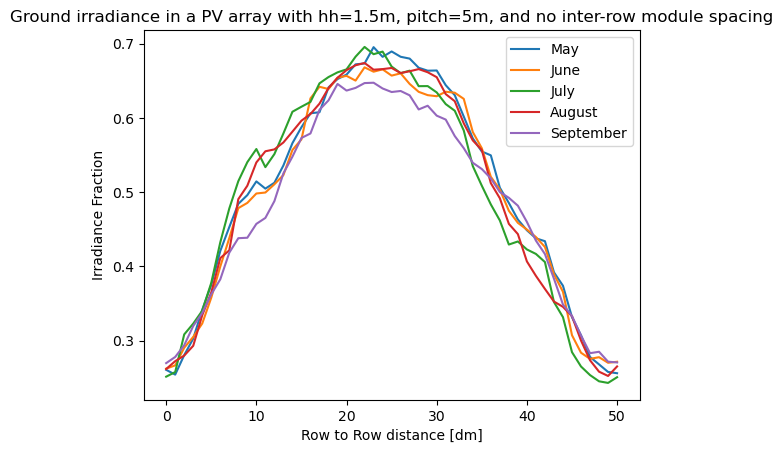

In [13]:
plt.plot(y1, label='May')
plt.plot(y2, label='June')
plt.plot(y3, label='July')
plt.plot(y4, label='August')
plt.plot(y5, label='September')
plt.title("Ground irradiance in a PV array with hh=1.5m, pitch=5m, and no inter-row module spacing")
plt.legend()
plt.ylabel('Irradiance Fraction')
plt.xlabel('Row to Row distance [dm]')